In [74]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sn
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

# Step-1: Data Gathering

In [ ]:
df=pd.read_csv('Telco-Customer-Churn.csv')
df.head(3)

In [ ]:
df.shape

In [ ]:
df.sample(3)

# Step-2: Data Preprocessing

In [ ]:
df.drop('customerID',axis='columns',inplace=True)

In [ ]:
df.sample(3)

In [ ]:
df.columns

In [ ]:
df.dtypes # show all column's name and data type

In [ ]:
df.info()

In [ ]:
df.TotalCharges.values # or
df['TotalCharges'].values

In [ ]:
pd.to_numeric(df['TotalCharges'], errors='coerce') # Convert argument to a numeric type.

In [ ]:
df['TotalCharges'].dtype

In [ ]:
df.shape

In [ ]:
df['TotalCharges'][753]

In [ ]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()] # identify which rows of TotalCharges these values are blank

In [ ]:
df.iloc[488] # iloc() function enables us to select a particular cell of the dataset, that is, it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset.

In [ ]:
df.iloc[488]['TotalCharges']

In [ ]:
df1=df[df['TotalCharges']!=' '] # Drop rows these are blank
df1.shape

In [ ]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges) # convert data type object to float

In [ ]:
df1['TotalCharges'].dtype

In [ ]:
df1.dtypes

In [ ]:
df1[df1.Churn=='No'] # return those customer did not leave

In [ ]:
df1[df1.Churn=='Yes'] # return those customer leave

# Step-3: data Visualization

| Histrograam on Tenure 

In [ ]:
tenure_churn_no=df1[df1.Churn=='No'].tenure # return tenure of those customer did not leave

In [ ]:
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure


In [ ]:
plt.figure(figsize=(10,6))
sn.set(style='white')
plt.grid()
plt.hist([tenure_churn_yes,tenure_churn_no], color=['green','red'],label=['Chrun: Yes','Chrun: No'])
plt.legend()
plt.title('Customer Churn prediction visualizaton')
plt.xlabel('Tenure')
plt.ylabel('Number of customer')
plt.show()

| Histrogram on MonthlyCharges 

In [ ]:
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges 
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

In [ ]:
plt.figure(figsize=(10,6))
sn.set(style='white')
plt.grid()
plt.hist([mc_churn_yes,mc_churn_no], color=['Yellow','Blue'],label=['Chrun: Yes','Chrun: No'])
plt.title('Customer Churn prediction visualizaton')
plt.xlabel('MonthlyCharges')
plt.ylabel('Number of customer')
plt.legend()
plt.show()

# Step-4: Data Preprocessing

In [ ]:
for column in df: # Return all column name
    print(column)

In [ ]:
for column in df: # Return list of unique values of all columns 
    print(f'{column} : {df[column].unique()}')

In [ ]:
def unique_column_values(df):
    for column in df: # Return list of unique values of those columns whose dtypes is object
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [ ]:
unique_column_values(df)

In [ ]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)


In [ ]:
def unique_column_values(df1):
    for column in df1: # Return list of unique values of those columns whose dtypes is object
        if df1[column].dtypes=='object':
            print(f'{column} : {df1[column].unique()}')

In [ ]:
unique_column_values(df1)

In [ ]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


In [ ]:
for col in yes_no_columns: # replacing yes to one and No to zero
    df1[col].replace({'Yes': 1,'No': 0}, inplace=True)

In [ ]:
df1['gender'].replace({'Female':1,'Male': 0},inplace=True) # replacing felame to one and male to zero

| One Hot Encoding

In [ ]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2

In [ ]:
df2.dtypes

In [ ]:
df2.columns

# Step-5: Scaling

In [ ]:
columns_to_scales=['tenure','MonthlyCharges','TotalCharges']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
df2[columns_to_scales]=scaler.fit_transform(df2[columns_to_scales])
df2

# Step-6: Train and test split

In [ ]:
x=df2.drop(['Churn'], axis='columns')
x.head()

In [ ]:
y=df2['Churn']
y


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
xtrain.shape

In [ ]:
xtest.shape

# Step-7: Building keras model 

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']

)
model.fit(xtrain,ytrain,epochs=100)

In [ ]:
model.evaluate(xtest,ytest)

In [ ]:
yp=model.predict(xtest) # predict ytest value using to xtest
yp[:10]

In [ ]:
ytest[:10] # compairing with y_p

In [ ]:
y_pred=[]  # yp/ predicted value to zero & one which are similar to ytest
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [73]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(ytest,y_pred)) # 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1033
           1       0.59      0.57      0.58       374

    accuracy                           0.78      1407
   macro avg       0.72      0.71      0.72      1407
weighted avg       0.78      0.78      0.78      1407



    Note: 
classification_report print statistical report on precision and recall |precision and recall are ploting performence of overoll model

In [ ]:
y_pred[:10]

| Confusion metrics

In [76]:
cm=tf.math.confusion_matrix(labels=ytest, predictions=y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[881, 152],
       [159, 215]])>

Text(66.5, 0.5, 'Truth')

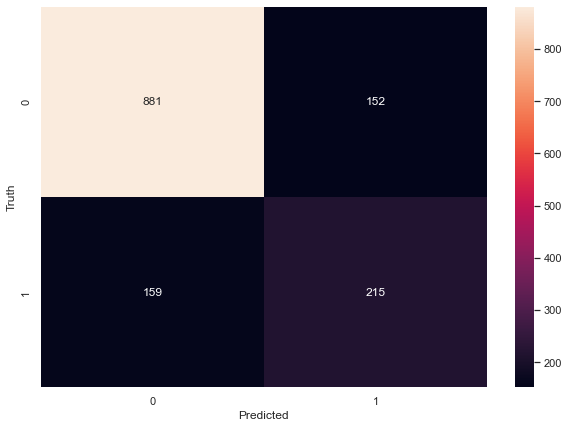

In [84]:

plt.figure(figsize=(10,7))
sn.set(style='white')
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [77]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[881, 152],
       [159, 215]])>

In [80]:
round((881+215)/(881+215+159+152),2)*100 # Accuracy calculating 

78.0

In [81]:
# precision for 0 class: i.e. precision for customers who did not churn 
round((881)/(881+159),2)*100 # precision calculating 

85.0

In [82]:
# precision for 1 class: i.e. precision for customers who actually churned
round((215)/(215+152),2)*100 # precision calculating 

59.0

In [85]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[881, 152],
       [159, 215]])>

In [86]:
# recall for 0 class: which is truth value of zero out of total predicted zero
round((881)/(881+152),2)*100 # recall calculating 

85.0

In [87]:
# recall for 1 class: which is truth value of one out of total predicted value of one
round((215)/(215+159),2)*100 # recall calculating 

56.99999999999999

In [ ]:
df2.sample(3)

In [ ]:
df2.dtypes